In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
def run_policy_eval(N_trials, epsilon):

    w = np.zeros((3, N_trials))

    for trial in range(1,N_trials):

        delta_U1 = 0
        delta_U2 = 0
        delta_U3 = 0

        # choose a random action (-1 = L, 0 = Middle, 1 = R)
        action = np.random.choice([-1 ,0 ,1])

        # chose action L or R
        if(action == -1):
            delta_U1 = 1 - w[0, trial - 1]
        if(action == 1):
            delta_U1 = 2 - w[0, trial - 1]

        # chose action M
        if(action == 0):
            # get randomly into state u2 or u3
            state = np.random.choice([2, 3])

            if(state == 2):
                # calculate delta for U1
                delta_U1 = -1 - w[0, trial - 1] + w[1, trial - 1]

                # choose a random action (-1 = L, 1 = R)
                action = np.random.choice([-1, 1])
                if(action == -1):
                    delta_U2 = 8 - w[1, trial - 1]
                if(action == 1):
                    delta_U2 = -8 - w[1, trial - 1]
            else:
                # calculate delta for U1
                delta_U1 = -1 - w[0, trial - 1] + w[2, trial - 1]

                # choose a random action (-1 = L, 1 = R)
                action = np.random.choice([-1, 1])
                if(action == -1):
                    delta_U3 = 0 - w[2, trial - 1]
                if(action == 1):
                    delta_U3 = 4 - w[2, trial - 1]

        # update weights
        w[0,trial] = w[0,trial - 1] + epsilon * delta_U1
        w[1,trial] = w[1,trial - 1] + epsilon * delta_U2
        w[2,trial] = w[2,trial - 1] + epsilon * delta_U3

    return w

In [231]:
# policy evaluation
np.random.seed(0)

N_simulations = 1000

N_trials = 1000
epsilon = 0.2

w = np.zeros((3, N_trials))
w_sim_0 = np.zeros((3, N_trials))

for i in range(N_simulations):
    if(i == 0):
        w_sim_0 = run_policy_eval(N_trials, epsilon)
        w += w_sim_0
    else:
        w += run_policy_eval(N_trials, epsilon)

w = w / N_simulations


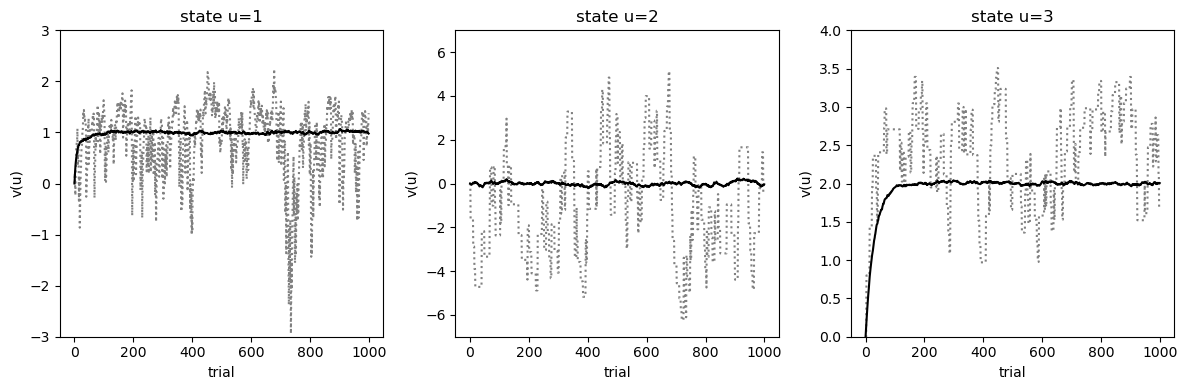

In [232]:
# plot results
fig, ax = plt.subplots(1,3, figsize=(12,4))

for i in range(3):
    ax[i].plot(range(N_trials),w_sim_0[i,:], ':', markersize=1, color='gray' ,label='single trial')
    ax[i].plot(range(N_trials),w[i,:], color='black',label='avg')
    ax[i].set_ylabel("v(u)")
    ax[i].set_xlabel("trial")
    
ax[0].set_ylim(-3, 3)
ax[1].set_ylim(-7, 7)
ax[2].set_ylim(0, 4)

ax[0].set_title('state u=1')
ax[1].set_title('state u=2')
ax[2].set_title('state u=3')

plt.tight_layout()
plt.show()


In [208]:
# policy improvement

def calculate_action_probs(ms):
    m_exp = np.exp(ms)
    return m_exp / (np.sum(m_exp))

def policy_improvement(N_trials, epsilon, epsilon_a):
    w = np.zeros((3, N_trials))
    p_u1 = np.zeros((3, N_trials))
    p_u2 = np.zeros((2, N_trials))
    p_u3 = np.zeros((2, N_trials))

    m_u1 = np.zeros(3)
    m_u2 = np.zeros(2)
    m_u3 = np.zeros(2)

    p_u1_current = calculate_action_probs(m_u1)
    p_u2_current = calculate_action_probs(m_u2)
    p_u3_current = calculate_action_probs(m_u3)

    for trial in range(1, N_trials):
        delta_U1 = 0
        delta_U2 = 0
        delta_U3 = 0

        p_u1_current = calculate_action_probs(m_u1)

        # choose a an action (-1 = L, 0 = Middle, 1 = R)
        action = np.random.choice([-1 ,0 ,1], p=p_u1_current)

        # chose action L
        if(action == -1):
            delta_U1 = 1 - w[0, trial - 1]

            # update actor
           # m_u1 = m_u1 * (1 - epsilon)
            m_u1[0] += epsilon_a * delta_U1

        # chose action R
        if(action == 1):
            delta_U1 = 2 - w[0, trial - 1]
            # update actor
            #m_u1 = m_u1 * (1 - epsilon)
            m_u1[2] += epsilon_a * delta_U1
    
        # chose action C
        if(action == 0):
            # get randomly into state u2 or u3
            state = np.random.choice([2, 3])

            if(state == 2):
                delta_U1 = -1 - w[0, trial - 1] + w[1, trial - 1]
            else:
                delta_U1 = -1 - w[0, trial - 1] + w[2, trial - 1]
            # update actor
            #m_u1 = m_u1 * (1 - epsilon)
            m_u1[1] += epsilon_a * delta_U1
            
            if(state == 2):
                # calculate action probabilities
                p_u2_current = calculate_action_probs(m_u2)

                # choose a an action (-1 = L, 1 = R)
                action = np.random.choice([-1 ,1], p=p_u2_current)

                if(action == -1):
                    delta_U2 = 8 - w[1, trial - 1]
                    # update actor
                    m_u2[0] += epsilon_a * delta_U2 # m_u2[0] * (1 - epsilon) + epsilon_a * delta_U2
                    #m_u2[1] = m_u2[1] * (1 - epsilon) 
                if(action == 1):
                    delta_U2 = -8 - w[1, trial - 1]
                    # update actor
                    #m_u2[0] = m_u2[0] * (1 - epsilon) 
                    m_u2[1] += epsilon_a * delta_U2 #m_u2[1] * (1 - epsilon) + epsilon_a * delta_U2

            if(state == 3):
                # calculate action probabilities
                p_u3_current = calculate_action_probs(m_u3)

                # choose a an action (-1 = L, 1 = R)
                action = np.random.choice([-1 ,1], p=p_u3_current)

                if(action == -1):
                    delta_U3 = 0 - w[2, trial - 1]
                    # update actor
                    m_u3[0] += epsilon_a * delta_U3 #m_u3[0] * (1 - epsilon) + epsilon_a * delta_U3
                    #m_u3[1] = m_u3[1] * (1 - epsilon) 
                if(action == 1):
                    delta_U3 = 4 - w[2, trial - 1]
                    # update actor
                    #m_u3[0] = m_u3[0] * (1 - epsilon) 
                    m_u3[1] += epsilon_a * delta_U3# m_u3[1] * (1 - epsilon) + epsilon_a * delta_U3
                
                
        # update weights
        w[0,trial] = w[0,trial - 1] + epsilon * delta_U1
        w[1,trial] = w[1,trial - 1] + epsilon * delta_U2
        w[2,trial] = w[2,trial - 1] + epsilon * delta_U3

        p_u1[:,trial] = p_u1_current
        p_u2[:,trial] = p_u2_current
        p_u3[:,trial] = p_u3_current

    return w, p_u1, p_u2, p_u3



In [227]:
np.random.seed(3)

N_simulations = 1000

N_trials = 1000
beta = 1
epsilon = 0.2
epsilon_a = 0.075

w = np.zeros((3, N_trials))
w_0 = np.zeros((3, N_trials))

p_u1 = np.zeros((3, N_trials))
p_u2 = np.zeros((2, N_trials))
p_u3 = np.zeros((2, N_trials))

p_u1_0 = np.zeros((3, N_trials))
p_u2_0 = np.zeros((3, N_trials))
p_u3_0 = np.zeros((3, N_trials))

for i in range(N_simulations):
    if(i == 0):
        w_0, p_u1_0, p_u2_0, p_u3_0 = policy_improvement(N_trials, epsilon, epsilon_a)
        w += w_0
        p_u1 += p_u1_0
        p_u2 += p_u2_0
        p_u3 += p_u3_0
    else:
        w_sim, p_u1_sim, p_u2_sim, p_u3_sim = policy_improvement(N_trials, epsilon, epsilon_a)
        w = w + w_sim
        p_u1 += p_u1_sim
        p_u2 += p_u2_sim
        p_u3 += p_u3_sim

w = w / N_simulations

p_u1 = p_u1 / N_simulations
p_u2 = p_u2 / N_simulations
p_u3 = p_u3 / N_simulations

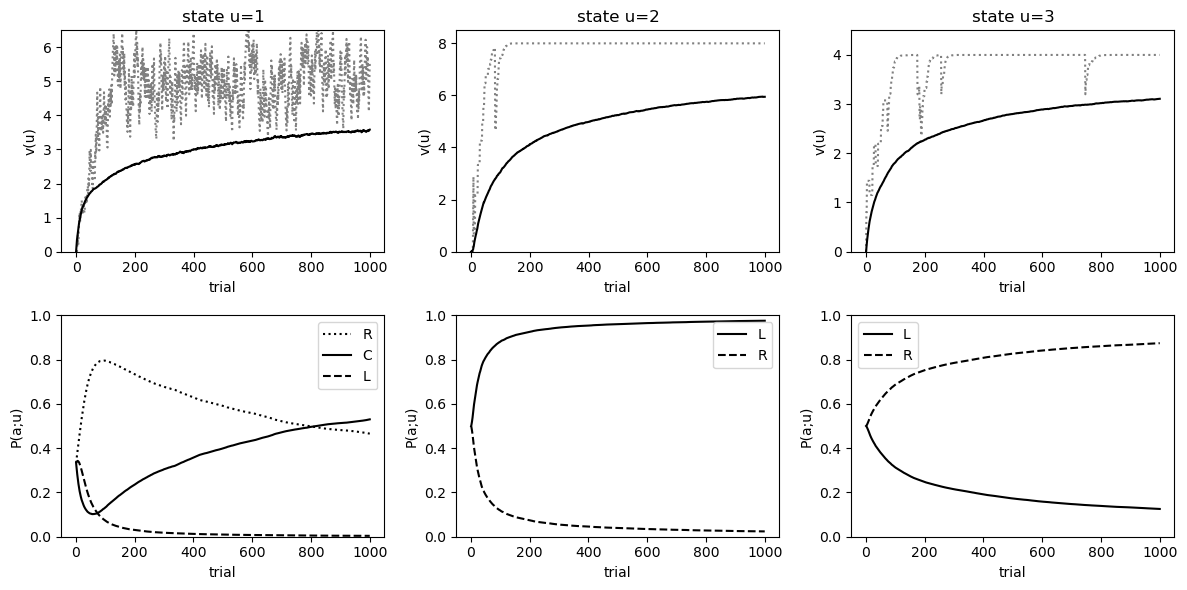

In [230]:


# plot results
fig, ax = plt.subplots(2,3, figsize=(12,6))

for i in range(3):
    ax[0,i].plot(range(N_trials),w_0[i,:], ':', markersize=1, color='gray' ,label='single trial')
    ax[0,i].plot(range(N_trials),w[i,:], color='black',label='avg')
    ax[0,i].set_ylabel("v(u)")
    ax[0,i].set_xlabel("trial")

    ax[1,i].set_ylabel("P(a;u)")
    ax[1,i].set_xlabel("trial")

ax[1,0].plot(range(1,N_trials),p_u1[2,1:], ':', markersize=1, color='black',label='R')
ax[1,0].plot(range(1,N_trials),p_u1[1,1:], markersize=1,color='black',label='C')
ax[1,0].plot(range(1,N_trials),p_u1[0,1:], '--', markersize=1, color='black',label='L')
ax[1,0].set_ylim(0, 1)
ax[1,0].legend()

ax[1,1].plot(range(1,N_trials),p_u2[0,1:], markersize=1,color='black',label='L')
ax[1,1].plot(range(1,N_trials),p_u2[1,1:], '--', markersize=1, color='black',label='R')
ax[1,1].set_ylim(0, 1)   
ax[1,1].legend()

ax[1,2].plot(range(1,N_trials),p_u3[0,1:], markersize=1,color='black',label='L')
ax[1,2].plot(range(1,N_trials),p_u3[1,1:], '--', markersize=1, color='black',label='R')
ax[1,2].set_ylim(0, 1)  
ax[1,2].legend()


ax[0,0].set_ylim(0, 6.5)
ax[0,1].set_ylim(0, 8.5)
ax[0,2].set_ylim(0, 4.5)

ax[0,0].set_title('state u=1')
ax[0,1].set_title('state u=2')
ax[0,2].set_title('state u=3')

plt.tight_layout()
plt.show()